<a href="https://colab.research.google.com/github/dddonghwa/deep-learning-with-python/blob/main/ch02_mathematical_components_of_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chapter 02 | 시작하기 전에 : 신경망의 수학적 구성 요소

## 2.1 신경망과의 첫 만남

#### MNIST 데이터세트

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/440px-MnistExamples.png'>   
*이미지 출처 : 위키피디아*

In [1]:
! pip install keras

In [2]:
# 코드 2-1 케라스에서 MNIST 데이터셋 적재하기
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#### 신경망 구조
- 2개의 신경망 층(layer)
- 28*28인 데이터 입력 → 512개의 뉴런 (은닉층) → 10개의 뉴런 (소프트맥스/출력 층)

In [3]:
# 코드 2-2 신경망 구조

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

#### 컴파일 단계
1) 손실 함수 : 출력값과 타겟값의 차이를 계산하는 함수  
2) 옵티마이저 : 손실함수를 감소시키는 방향으로 신경망을 업데이트하는 메커니즘   
3) 훈련과 테스트 과정을 모니터링할 지표

In [4]:
# 코드 2-3 컴파일 단계

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

데이터를 신경망에 맞는 크기(n_images, n_pixels)로 바꾸고 모든 값을 (0,1) 사이 값으로 스케일링

In [5]:
# 코드 2-4 이미지 데이터 준비하기

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [6]:
! pip install np_utils

     |████████████████████████████████| 61 kB 5.0 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57131 sha256=80198485096611db0d2563617cc995415205e536a077cf72d60ce1aaff94e706
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


범주형 데이터인 레이블을 원핫인코딩으로

In [7]:
# 코드 2-5 레이블 준비하기
from keras.utils.np_utils import to_categorical
# from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


모델 학습

In [8]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2555 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1026 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0677 - accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0492 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0378 - accuracy: 0.9883


In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test_acc :", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0644 - accuracy: 0.9807
test_acc : 0.9807000160217285


#### 결과
- 훈련 세트 정확도 98.94%, 테스트 세트 정확도 : 97.97% → 과적합

## 2.2 신경망을 위한 데이터 표현

#### ndim
- 데이터의 차원수 
- 텐서의 축 개수, 랭크(rank)라고도 부름


In [10]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


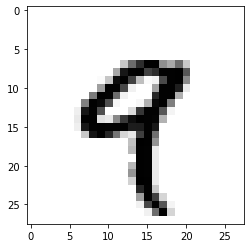

In [11]:
# 코드 2-6 다섯번째 이미지 출력하기

digit = train_images[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### 2.2.7 배치 데이터
- 데이터 텐서의 첫번째 축(index=0)을 __샘플 축(sample axis)__
- 딥러닝 모델은 전체 데이터 셋을 한번에 처리하지 않고, 작은 배치(batch)로 나누어서 처리

~~~
batch = train_images[:128]
~~~
이러한 배치 데이터를 다룰 때는 첫번째 축을 __배치 축(batch axis)__ 또는 __배치 차원(batch dimension)__이라고 한다.

### 2.2.8 텐서의 실제 사례

| 데이터 종류 | 크기 | 차원 |
|:--:|:--:|:--:|
| 벡터 데이터 | (samples, features) | 2D |
| 시계열/시퀀스 데이터 | (samples, timesteps, features) | 3D |  
| 이미지 | (samples, height, width, channels) <br> (samples, channels, height, width) | 4D |
| 동영상 | (samples, frames, height, width, channels) <br> (samples, frames, channels, height, width) | 5D | 

### 2.2.9 벡터 데이터
- 대부분의 경우에 해당
- 하나의 데이터 포인트가 벡터로 인코딩될 수 있으므로 배치 데이터는 2D 텐서로 인코딩될 것
- 여기서 첫 번째 축은 샘플 축이고, 두 번째 축은 특성 축

### 2.2.10 시계열 데이터 또는 시퀀스 데이터
- 데이터에서 시간이 중요할 때 시간 축을 포함한 3D 텐서로 저장
- 관례적으로 시간 축을 항상 두 번째 축(index=1)으로 사용  
예) 주식 가격 데이터셋, 트윗 데이터셋 

### 2.2.11 이미지 데이터
- 높이, 너비, 컬러 채널의 3차원에 샘플의 개수가 있어서 4차원 텐서로 포매팅, 이미지가 흑백이라면 컬러 채널을 제외하여 3차원 텐서로 표현
- 이미지 텐서의 크기 지정  
1) 채널 마지막 (channel-last) : (samples, height, width, channels) 텐서플로우  
2) 채널 우선 (channel-first) : (samples, color_depth, height, width) 씨아노  

### 2.2.12 비디오 데이터
- 5D 텐서가 필요한 데이터
